# Impeller Stress and Frequency Prediction

## Polynominal Linear Regression

<h2 style="color:cyan">Import Libraries</h2>

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

<h2 style="color:cyan">Read Data</h2>

In [2]:
filename_train = 'https://raw.githubusercontent.com/sonpn82/Impeller-stress-prediction/main/Impeller%20stress%20prediction%20database%20-%20stress%20and%20freq.csv'
filename_test = 'https://raw.githubusercontent.com/sonpn82/Impeller-stress-prediction/main/Impeller%20stress%20prediction%20database%20-%20test%20data.csv'
filename_eva = 'https://raw.githubusercontent.com/sonpn82/Impeller-stress-prediction/main/Impeller%20stress%20prediction%20database%20-%20evaluation%20data.csv'

df = pd.read_csv(filename_train)
df_test = pd.read_csv(filename_test)
df_eva = pd.read_csv(filename_eva)

<h2 style="color:cyan">Data Exploring</h2>

In [3]:
df_eva.head()

,No,Model,Speed,MatDensity,MatYoung,D2,DB,tm,ts,ti,...,hasVaneRimOut,Vane max stress loc,Weight,GD2,Sm,Ss,Sv,Si,Frequency,Frequency0
0,1,H,1785,7850,205,2130,580,12,9.0,0,...,0,NaN,NaN,NaN,415.9,561.4,849.2,0,37.33,22.45
1,2,H,1785,7850,205,2130,580,15,12.0,0,...,0,NaN,NaN,NaN,497.6,510.2,522.3,0,38.51,25.08
2,3,H,1785,7850,205,2130,580,9,6.0,0,...,0,NaN,NaN,NaN,801.0,1200.0,914.2,0,34.60,16.11
3,4,H,1785,7850,205,1830,580,12,9.0,0,...,0,NaN,NaN,NaN,323.3,350.8,720.8,0,47.64,37.62
4,5,H,1785,7850,205,1830,580,9,12.0,0,...,0,NaN,NaN,NaN,428.0,355.3,433.1,0,41.17,29.01


In [3]:
print(df.shape)
print(df_test.shape)
print(df_eva.shape)

(392, 27)
(53, 27)
(21, 27)


In [5]:
df.describe()

,No,Speed,MatDensity,MatYoung,D2,DB,tm,ts,ti,tv,...,hasVaneRimIn,hasVaneRimOut,Weight,GD2,Sm,Ss,Sv,Si,Frequency,Frequency0
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.0,392.000000,...,392.0,392.000000,184.000000,184.000000,354.000000,354.000000,354.000000,392.0,299.000000,179.00000
mean,139.038265,1788.775510,7850.586735,204.663265,1493.239796,410.612245,10.420918,6.484694,0.0,4.253061,...,0.0,0.017857,358.130338,209.453730,228.147288,377.384237,407.969605,0.0,49.404609,35.54905
std,59.886560,236.184029,8.577174,4.149246,419.702383,151.506105,3.351928,2.978657,0.0,1.212948,...,0.0,0.132601,305.997757,284.946719,164.242192,243.235288,292.184455,0.0,13.271836,8.55111
min,1.000000,890.000000,7850.000000,139.000000,755.000000,200.000000,4.500000,3.200000,0.0,3.200000,...,0.0,0.000000,41.518300,3.690200,13.400000,18.100000,18.200000,0.0,31.710000,12.51000
25%,98.750000,1785.000000,7850.000000,205.000000,1200.000000,280.000000,9.000000,4.500000,0.0,3.200000,...,0.0,0.000000,90.500000,13.800000,115.450000,206.825000,210.745000,0.0,41.635000,30.40000
50%,154.000000,1785.000000,7850.000000,205.000000,1500.000000,410.000000,12.000000,6.000000,0.0,4.500000,...,0.0,0.000000,252.653800,84.878800,178.300000,360.250000,388.550000,0.0,45.598000,35.14000
75%,186.250000,1785.000000,7850.000000,205.000000,1800.000000,580.000000,12.000000,9.000000,0.0,4.500000,...,0.0,0.000000,534.420000,308.027750,304.975000,472.875000,504.975000,0.0,52.120000,41.50000
max,222.000000,3575.000000,8000.000000,205.000000,2500.000000,580.000000,19.000000,15.000000,0.0,9.000000,...,0.0,1.000000,1261.900000,1172.200000,1616.500000,1943.000000,2949.000000,0.0,112.680000,61.70000


<h2 style="color:cyan">Drop unused column</h2>

In [4]:
df.drop(['No', 'Model', 'Vane max stress loc'], axis=1, inplace=True)
df_test.drop(['No', 'Model', 'Vane max stress loc'], axis=1, inplace=True)
df_eva.drop(['No', 'Model', 'Vane max stress loc'], axis=1, inplace=True)

# fill NA with 0
df.fillna(0, inplace=True)
df_test.fillna(0, inplace=True)
df_eva.fillna(0, inplace=True)

In [7]:
df.head()

,Speed,MatDensity,MatYoung,D2,DB,tm,ts,ti,tv,Rib,...,hasVaneRimIn,hasVaneRimOut,Weight,GD2,Sm,Ss,Sv,Si,Frequency,Frequency0
0,3575,7850,205,755,200,6.0,4.5,0,3.2,1,...,0,0,46.6831,4.105,216.6,292.3,294.5,0,100.46,0.0
1,1785,7850,205,755,200,6.0,4.5,0,3.2,1,...,0,0,46.6831,4.105,53.9,72.9,73.5,0,86.74,0.0
2,1185,7850,205,755,200,6.0,4.5,0,3.2,1,...,0,0,46.6831,4.105,23.8,32.1,32.4,0,83.93,0.0
3,890,7850,205,755,200,6.0,4.5,0,3.2,1,...,0,0,46.6831,4.105,13.4,18.1,18.2,0,82.90,0.0
4,1785,7930,205,755,200,6.0,4.5,0,3.2,1,...,0,0,46.6831,4.105,54.5,73.6,74.2,0,86.35,0.0


<h2 style="color:cyan">Check correlation between columns</h2>

In [11]:
df.corr()

,Speed,MatDensity,MatYoung,D2,DB,tm,ts,ti,tv,Rib,...,hasVaneRimIn,hasVaneRimOut,Weight,GD2,Sm,Ss,Sv,Si,Frequency,Frequency0
Speed,1.000000,-0.001483,0.001760,-0.001451,0.001447,-0.004291,0.001526,NaN,-0.002624,-0.010037,...,NaN,-0.002927,0.002927,-0.000311,0.472565,0.426743,0.432311,NaN,0.143159,-0.015548
MatDensity,-0.001483,1.000000,0.007538,-0.119770,-0.093963,-0.089536,-0.043593,NaN,-0.068273,-0.114896,...,NaN,-0.012535,-0.048279,-0.041420,-0.057309,-0.068816,-0.061854,NaN,0.157901,-0.066586
MatYoung,0.001760,0.007538,1.000000,0.142140,0.111513,0.106259,0.051735,NaN,0.081024,0.136355,...,NaN,0.014876,0.057296,0.049156,0.068484,0.082048,0.073731,NaN,-0.145700,0.079022
D2,-0.001451,-0.119770,0.142140,1.000000,0.931447,0.788284,0.667167,NaN,0.415232,0.293465,...,NaN,0.035281,0.823278,0.797514,0.652370,0.585469,0.670688,NaN,-0.292047,0.018605
DB,0.001447,-0.093963,0.111513,0.931447,1.000000,0.763665,0.701605,NaN,0.399241,0.240408,...,NaN,0.067229,0.707267,0.616022,0.575839,0.451974,0.555060,NaN,-0.104636,0.038362
tm,-0.004291,-0.089536,0.106259,0.788284,0.763665,1.000000,0.495675,NaN,0.271862,0.193517,...,NaN,0.004465,0.649585,0.621549,0.421036,0.444822,0.505714,NaN,-0.103425,0.148986
ts,0.001526,-0.043593,0.051735,0.667167,0.701605,0.495675,1.000000,NaN,0.210178,0.147743,...,NaN,0.055774,0.659389,0.588648,0.488183,0.196924,0.412640,NaN,-0.045538,-0.087412
ti,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tv,-0.002624,-0.068273,0.081024,0.415232,0.399241,0.271862,0.210178,NaN,1.000000,0.205260,...,NaN,-0.005490,0.406202,0.357426,0.361805,0.428293,0.307120,NaN,-0.158868,-0.030826
Rib,-0.010037,-0.114896,0.136355,0.293465,0.240408,0.193517,0.147743,NaN,0.205260,1.000000,...,NaN,0.026453,0.272521,0.221472,0.227435,0.253357,0.174173,NaN,-0.280303,-0.262959


In [25]:
# Remove speed for impeller stress prediction data - speed effect will be estimated separately
df_clean = df.loc[df['Speed'] == 1785].loc[df['MatDensity'] == 7850].loc[df['MatYoung'] == 205].loc[df['hasMouthRing'] == 0].loc[df['isStraightSide'] == 0].loc[df['hasRimout'] == 0].loc[df['hasRimIn'] == 0].loc[df['hasVaneRimOut'] == 0]
df_clean_test = df_test.loc[df_test['Speed'] == 1785].loc[df_test['MatDensity'] == 7850].loc[df_test['MatYoung'] == 205].loc[df_test['hasMouthRing'] == 0].loc[df_test['isStraightSide'] == 0].loc[df_test['hasRimout'] == 0].loc[df_test['hasRimIn'] == 0].loc[df_test['hasVaneRimOut'] == 0]
df_clean_eva = df_eva.loc[df_eva['Speed'] == 1785].loc[df_eva['MatDensity'] == 7850].loc[df_eva['MatYoung'] == 205].loc[df_eva['hasMouthRing'] == 0].loc[df_eva['isStraightSide'] == 0].loc[df_eva['hasRimout'] == 0].loc[df_eva['hasRimIn'] == 0].loc[df_eva['hasVaneRimOut'] == 0]

df_clean.drop(['Speed', 'MatDensity', 'MatYoung', 'ti', 'hasMouthRing', 'isStraightSide', 'hasRimout', 'hasRimIn', 'hasVaneRimIn', 'hasVaneRimOut'], axis=1, inplace=True)
df_clean_test.drop(['Speed', 'MatDensity', 'MatYoung', 'ti', 'hasMouthRing', 'isStraightSide', 'hasRimout', 'hasRimIn', 'hasVaneRimIn', 'hasVaneRimOut'], axis=1, inplace=True)
df_clean_eva.drop(['Speed', 'MatDensity', 'MatYoung', 'ti', 'hasMouthRing', 'isStraightSide', 'hasRimout', 'hasRimIn', 'hasVaneRimIn', 'hasVaneRimOut'], axis=1, inplace=True)

# Scale D2 and DB
df_clean['D2'] = df_clean['D2'] / 1000
df_clean['DB'] = df_clean['DB'] / 1000
df_clean_test['D2'] = df_clean_test['D2'] / 1000
df_clean_test['DB'] = df_clean_test['DB'] / 1000
df_clean_eva['D2'] = df_clean_eva['D2'] / 1000
df_clean_eva['DB'] = df_clean_eva['DB'] / 1000

# stress dataframe
df_stress = df_clean.loc[df_clean['Sm'] != 0].loc[df_clean['Ss'] != 0].loc[df_clean['Sv'] != 0]
df_stress_test = df_clean_test.loc[df_clean_test['Sm'] != 0].loc[df_clean_test['Ss'] != 0].loc[df_clean_test['Sv'] != 0]
df_stress_eva = df_clean_eva.loc[df_clean_eva['Sm'] != 0].loc[df_clean_eva['Ss'] != 0].loc[df_clean_eva['Sv'] != 0]

# frequency dataframe
df_frequency = df_clean.loc[df_clean['Rib'] == 2].loc[df_clean['Frequency'] != 0].loc[df_clean['Frequency0'] != 0]
df_frequency_test = df_clean_test.loc[df_clean_test['Rib'] == 2].loc[df_clean_test['Frequency'] != 0].loc[df_clean_test['Frequency0'] != 0]
df_frequency_eva = df_clean_eva.loc[df_clean_eva['Rib'] == 2].loc[df_clean_eva['Frequency'] != 0].loc[df_clean_eva['Frequency0'] != 0]

# weight dataframe
df_weight = df_clean.loc[df_clean['Weight'] != 0].loc[df_clean['Rib'] == 2].loc[df_clean['D2'] != 1.2].loc[df_clean['D2'] != 0.755]
df_weight_test = df_clean_test.loc[df_clean_test['Weight'] != 0].loc[df_clean_test['Rib'] == 2]

print(df_stress.shape)
print(df_stress_test.shape)
print(df_stress_eva.shape)
print(df_weight.shape)
print(df_weight_test.shape)

(302, 14)
(31, 14)
(21, 14)
(132, 14)
(14, 14)


In [6]:
# Limit some value
df_stress = df_stress.loc[df_stress['D2'] < 2.1]
df_stress_test = df_stress_test.loc[df_stress_test['D2'] < 2.1]
# df_frequency = df_frequency.loc[df_frequency['Frequency'] < 86]
# df_weight = df_weight.loc[df_weight['Frequency'] < 86]

In [10]:
df_stress.head()

,D2,DB,tm,ts,tv,Rib,Weight,GD2,Sm,Ss,Sv,Si,Frequency,Frequency0
1,0.755,0.2,6.0,4.5,3.2,1,46.6831,4.1050,53.9,72.9,73.5,0,86.74,0.0
12,0.755,0.2,6.0,4.5,3.2,2,46.6831,4.1050,53.3,72.6,68.2,0,86.66,0.0
13,0.755,0.2,6.0,4.5,3.2,3,46.6831,4.1050,51.8,73.4,69.7,0,86.50,0.0
14,0.755,0.2,6.0,4.5,3.2,4,46.6831,4.1050,46.1,74.0,70.8,0,86.29,0.0
16,0.755,0.2,4.5,4.5,3.2,1,41.5183,3.6902,56.1,73.3,74.4,0,72.70,0.0


In [11]:
df_frequency.head()

,D2,DB,tm,ts,tv,Rib,Weight,GD2,Sm,Ss,Sv,Si,Frequency,Frequency0
26,1.5,0.41,9.0,4.5,4.5,2,239.387600,80.692,237.0,432.0,409.2,0,43.16,31.06
39,1.5,0.41,6.0,4.5,4.5,2,199.854267,68.422,221.9,411.4,362.4,0,37.20,21.36
40,1.5,0.41,12.0,4.5,4.5,2,278.920933,92.962,153.1,461.2,437.5,0,48.00,37.75
41,1.5,0.41,15.0,4.5,4.5,2,318.454267,105.232,130.4,481.7,453.4,0,51.55,42.28
42,1.5,0.41,9.0,3.2,4.5,2,226.267600,75.686,237.1,688.4,508.3,0,44.07,31.93


In [7]:
df_weight.head()

,D2,DB,tm,ts,tv,Rib,Weight,GD2,Sm,Ss,Sv,Si,Frequency,Frequency0
12,0.755,0.20,6.0,4.5,3.2,2,46.683100,4.105,53.3,72.6,68.2,0,86.66,0.00
26,1.500,0.41,9.0,4.5,4.5,2,239.387600,80.692,237.0,432.0,409.2,0,43.16,31.06
39,1.500,0.41,6.0,4.5,4.5,2,199.854267,68.422,221.9,411.4,362.4,0,37.20,21.36
40,1.500,0.41,12.0,4.5,4.5,2,278.920933,92.962,153.1,461.2,437.5,0,48.00,37.75
41,1.500,0.41,15.0,4.5,4.5,2,318.454267,105.232,130.4,481.7,453.4,0,51.55,42.28


<h2 style="color:cyan">Data exploratory analysis</h2>

In [26]:
# Input parameters for stress
x_train_stress = df_stress[['D2','tm','ts','tv','Rib']]
x_test_stress = df_stress_test[['D2','tm','ts','tv','Rib']]
x_eva_stress =  df_stress_eva[['D2','tm','ts','tv','Rib']]

# for weight
x_train_weight = df_weight[['D2','tm','ts','tv']]
x_test_weight = df_weight_test[['D2','tm','ts','tv']]

x_train_stress.head()

,D2,tm,ts,tv,Rib
1,0.755,6.0,4.5,3.2,1
12,0.755,6.0,4.5,3.2,2
13,0.755,6.0,4.5,3.2,3
14,0.755,6.0,4.5,3.2,4
16,0.755,4.5,4.5,3.2,1


In [27]:
# Input parameters for frequency
x_train_frequency = df_frequency[['D2','tm','ts','tv','DB']]
x_test_frequency = df_frequency_test[['D2','tm','ts','tv', 'DB']]
x_eva_frequency = df_frequency_eva[['D2','tm','ts','tv', 'DB']]

x_eva_frequency.head()

,D2,tm,ts,tv,DB
0,2.130,12,9.0,4.5,0.58
3,1.830,12,9.0,3.2,0.58
7,1.035,9,4.5,4.5,0.24
9,1.455,9,3.2,3.2,0.41
12,1.640,12,4.5,3.2,0.48


In [28]:
# Output parameters for stress
ym_train_stress = df_stress[['Sm','Ss','Sv','Si']]
ym_test_stress = df_stress_test[['Sm','Ss','Sv','Si']]
ym_eva_stress = df_stress_eva[['Sm','Ss','Sv','Si']]
ym_eva_stress.head()

,Sm,Ss,Sv,Si
0,415.9,561.4,849.2,0
1,497.6,510.2,522.3,0
2,801.0,1200.0,914.2,0
3,323.3,350.8,720.8,0
4,428.0,355.3,433.1,0


In [29]:
# Output parameters for weight
ym_train_weight = df_weight[['Weight', 'GD2']]
ym_test_weight = df_weight_test[['Weight', 'GD2']]
ym_train_weight.head()

,Weight,GD2
26,239.387600,80.692
39,199.854267,68.422
40,278.920933,92.962
41,318.454267,105.232
42,226.267600,75.686


In [30]:
# Output parameters for frequency
ym_train_frequency = df_frequency[['Frequency','Frequency0']]
ym_test_frequency = df_frequency_test[['Frequency','Frequency0']]
ym_eva_frequency = df_frequency_eva[['Frequency','Frequency0']]
ym_train_frequency.head()

,Frequency,Frequency0
26,43.16,31.06
39,37.20,21.36
40,48.00,37.75
41,51.55,42.28
42,44.07,31.93


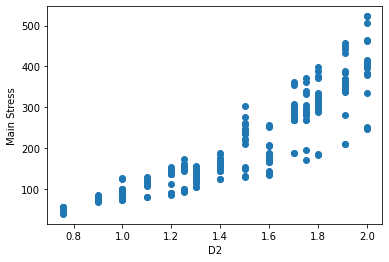

In [13]:
# plot main stress Vs impeller D2
plt.scatter(x_train_stress.D2, ym_train_stress.Sm)
plt.xlabel('D2')
plt.ylabel('Main Stress')
plt.show()

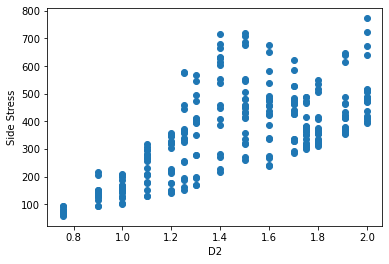

In [19]:
# plot side stress Vs impeller D2
plt.scatter(x_train_stress.D2,ym_train_stress.Ss)
plt.xlabel('D2')
plt.ylabel('Side Stress')
plt.show()

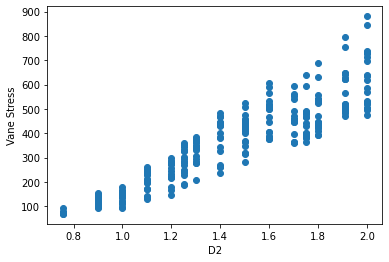

In [20]:
# plot vane stress Vs impeller D2
plt.scatter(x_train_stress.D2,ym_train_stress.Sv)
plt.xlabel('D2')
plt.ylabel('Vane Stress')
plt.show()

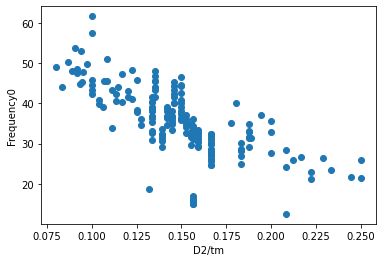

In [21]:
# plot frequency Vs D2/tm
plt.scatter(x_train_frequency.D2/x_train_frequency.tm,ym_train_frequency.Frequency0)
plt.xlabel('D2/tm')
plt.ylabel('Frequency0')
plt.show()

<h2 style="color:cyan">Function for Polynominal Regression</h2>

In [14]:
df_coef = pd.DataFrame()  # To save coefficients of fitting function

def polyEstimate(x_train_sm, y_train_sm, x_test_sm, y_test_sm, order=2 ,output=1, print_test = 0): 

    # Transform input data into polynominal features
    x_train_sm_transform = PolynomialFeatures(degree=order).fit_transform(x_train_sm)
    x_train_sm_transform.shape  # 1, x, y, x2, xy, y2
    x_test_sm_transform = PolynomialFeatures(degree=order).fit_transform(x_test_sm)

    # Create a linear regression model
    poly = LinearRegression()
    poly.fit(x_train_sm_transform, y_train_sm)  # transformed x data can be used as a linear regression model

    # Predict value of train data
    yhat_sm = poly.predict(x_train_sm_transform)
    yhat_test_sm = poly.predict(x_test_sm_transform)

    # Plot predict and true data
    df_result = pd.DataFrame(list(zip(y_train_sm,yhat_sm)), columns=['True_Value','Predict_Value'])
    if (output==1):
        fig = px.scatter(df_result, x='True_Value', y='Predict_Value', trendline='ols', height=400, width=500, title='Train data')
        fig.update_layout(margin=dict(l=10,r=10,t=20,b=10))
        fig.show()

    # Plot predict and true data
    df_test_result = pd.DataFrame(list(zip(y_test_sm,yhat_test_sm)), columns=['True_Value','Predict_Value'])
    if (output==1):
        fig2 = px.scatter(df_test_result, x='True_Value', y='Predict_Value', trendline='ols', height=400, width=500, title='Test data')
        fig2.update_layout(margin=dict(l=10,r=10,t=20,b=10))
        fig2.show()

    if (print_test==1):
        print(df_test_result)

    # Model Evaluation
    if (output==1):
        print("Residual sum of squares for train (MSE): %.2f" % np.mean((y_train_sm - yhat_sm) ** 2))
        print("R2-score for train: %.2f" % r2_score(y_train_sm , yhat_sm))

        print("Residual sum of squares for test (MSE): %.2f" % np.mean((y_test_sm - yhat_test_sm) ** 2))
        print("R2-score for test: %.2f" % r2_score(y_test_sm , yhat_test_sm))

        # Extract the coefficient
        columns_name = (PolynomialFeatures(degree=order).fit(x_train_sm).get_feature_names(x_train_sm.columns))
        columns_name = columns_name[1:]
        columns_name.append("Intercept")

        data = poly.coef_[1:]
        data = np.append(data, poly.intercept_).reshape(1,data.shape[0]+1)

        df_coef = pd.DataFrame(data, columns=columns_name)
        df_coef.to_clipboard()
        print('Coefficent shape:', df_coef.shape)
        return yhat_sm, yhat_test_sm
    else:
        return r2_score(y_train_sm, yhat_sm), r2_score(y_test_sm, yhat_test_sm)     

<h2 style="color:cyan">Polynomial Regression Model - All inputs - Main Stress</h2>

In [23]:
# All parameters
polyEstimate(x_train_stress, ym_train_stress.Sm, x_test_stress, ym_test_stress.Sm, print_test=1)

    True_Value  Predict_Value
0       140.40     170.035467
1       143.30     157.226515
2       139.90     175.207676
3        75.06      77.769652
4        74.20      76.238634
5       250.00     222.860876
6       334.36     292.270357
7       350.20     364.536416
8       442.30     374.817014
9       130.00     113.662809
10      128.20     135.786478
11       94.30     106.952332
12      152.90     186.050635
13      182.50     204.448203
14      155.40     166.228045
15      141.70     169.449457
16      145.50     156.742014
17       74.70      75.134101
18      253.90     217.090193
19      339.00     292.177953
20      357.90     365.479253
21      409.20     372.918048
22      132.00     106.873067
23      124.20     133.658730
24       97.28     103.227680
25      145.80     179.768544
26      177.80     201.235159
27      155.88     164.022517
Residual sum of squares for train (MSE): 519.93
R2-score for train: 0.96
Residual sum of squares for test (MSE): 718.70
R2-score f

(array([ 57.48371252,  58.45361048,  56.99743428,  53.11518394,
         56.17511443,  58.48567315,  57.33398637,  55.94608271,
         56.4826836 ,  45.56028483,  52.21047064,  42.49007506,
        221.16032511, 217.51597892, 220.55118909, 219.34338699,
        254.58075799, 185.58624483, 147.85851713, 211.30296196,
        229.7589885 , 238.03597436, 206.29954386, 234.6714947 ,
        250.00705837,  97.62804181,  92.38168731,  96.21790164,
         96.61210784, 101.74059312,  87.78770364,  82.05991678,
         92.66002219, 100.58515497,  97.57904036,  99.60714206,
         99.78916901, 414.21881889, 414.84185947, 415.74337625,
        410.26818737, 474.01574753, 352.26824283, 288.16401937,
        395.96083074, 420.58301914, 415.05343149, 384.9849013 ,
        444.31437655, 492.81871638, 296.36805898, 297.7905905 ,
        298.29236181, 292.017682  , 345.4337829 , 245.14868765,
        191.77566891, 284.02071828, 296.82161178, 285.38137669,
        274.43954256, 318.0343076 , 349.

<h2 style="color:cyan">Main stress - Remodeling</h2>

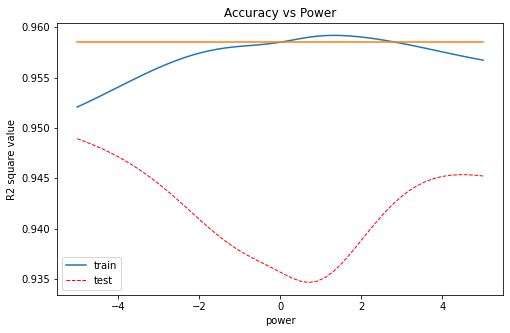

In [24]:
import math
accuracy_train = []
accuracy_test = []
x = np.linspace(-5, 5, 50)

for p in x:   

    p1 = p
    p2 = 1.8
    p3 = 1
    df_str = df_stress.copy()
    df_str_test = df_stress_test.copy()
    df_str['tm'] = df_str['tm'].apply(lambda x: math.pow(x,p2))
    df_str_test['tm'] = df_str_test['tm'].apply(lambda x: math.pow(x,p2))
    df_str['ts'] = df_str['ts'].apply(lambda x: math.pow(x,p1))
    df_str_test['ts'] = df_str_test['ts'].apply(lambda x: math.pow(x,p1))
    df_str['tv'] = df_str['tv'].apply(lambda x: math.pow(x,p1))
    df_str_test['tv'] = df_str_test['tv'].apply(lambda x: math.pow(x,p1))
    df_str['Rib'] = df_str['Rib'].apply(lambda x: math.pow(x,p1))
    df_str_test['Rib'] = df_str_test['Rib'].apply(lambda x: math.pow(x,p1))
    df_str['D2'] = df_str['D2'].apply(lambda x: math.pow(x,p3))
    df_str_test['D2'] = df_str_test['D2'].apply(lambda x: math.pow(x,p3))    

    # Input parameters
    x_train_str = df_str[['D2','Rib','tm','ts','tv']]
    x_test_str = df_str_test[['D2','Rib','tm','ts','tv']]

    accuracy_train1, accuracy_test1 = polyEstimate(x_train_str, ym_train_stress.Sm, x_test_str, ym_test_stress.Sm,order=2,output=0)
    accuracy_train.append(accuracy_train1)
    accuracy_test.append(accuracy_test1)
    
import matplotlib.pyplot as plt
import numpy as np

plt.figure(num = 3, figsize=(8, 5))
plt.plot(x, accuracy_train, label='train')
plt.plot(x, 0.9585*np.ones(50))
plt.plot(x, accuracy_test, 
         color='red',   
         linewidth=1.0,  
         linestyle='--', 
         label='test'
        )

plt.legend()
plt.xlabel("power")
plt.ylabel("R2 square value")
plt.title("Accuracy vs Power")

plt.show()

<h2 style="color:cyan">Best model for main stress</h2>

In [25]:
p1 = 2.5
p2 = 1.8
p3 = 1
df_str = df_stress.copy()
df_str_test = df_stress_test.copy()
df_str['tm'] = df_str['tm'].apply(lambda x: math.pow(x,p2))
df_str_test['tm'] = df_str_test['tm'].apply(lambda x: math.pow(x,p2))
df_str['ts'] = df_str['ts'].apply(lambda x: math.pow(x,p1))
df_str_test['ts'] = df_str_test['ts'].apply(lambda x: math.pow(x,p1))
df_str['tv'] = df_str['tv'].apply(lambda x: math.pow(x,p1))
df_str_test['tv'] = df_str_test['tv'].apply(lambda x: math.pow(x,p1))
df_str['Rib'] = df_str['Rib'].apply(lambda x: math.pow(x,p1))
df_str_test['Rib'] = df_str_test['Rib'].apply(lambda x: math.pow(x,p1))
df_str['D2'] = df_str['D2'].apply(lambda x: math.pow(x,p3))
df_str_test['D2'] = df_str_test['D2'].apply(lambda x: math.pow(x,p3))

# Input parameters
x_train_str = df_str[['D2','Rib','tm','ts','tv']]
x_test_str = df_str_test[['D2','Rib','tm','ts','tv']]

accuracy_train1, accuracy_test1 = polyEstimate(x_train_str, ym_train_stress.Sm, x_test_str, ym_test_stress.Sm,order=2,output=1)

Residual sum of squares for train (MSE): 519.67
R2-score for train: 0.96
Residual sum of squares for test (MSE): 642.91
R2-score for test: 0.94
Coefficent shape: (1, 21)


In [26]:
# Evaluation result
p1 = 2.5
p2 = 1.8
p3 = 1
df_str = df_stress.copy()
df_str_eva = df_stress_eva.copy()
df_str['tm'] = df_str['tm'].apply(lambda x: math.pow(x,p2))
df_str_eva['tm'] = df_str_eva['tm'].apply(lambda x: math.pow(x,p2))
df_str['ts'] = df_str['ts'].apply(lambda x: math.pow(x,p1))
df_str_eva['ts'] = df_str_eva['ts'].apply(lambda x: math.pow(x,p1))
df_str['tv'] = df_str['tv'].apply(lambda x: math.pow(x,p1))
df_str_eva['tv'] = df_str_eva['tv'].apply(lambda x: math.pow(x,p1))
df_str['Rib'] = df_str['Rib'].apply(lambda x: math.pow(x,p1))
df_str_eva['Rib'] = df_str_eva['Rib'].apply(lambda x: math.pow(x,p1))
df_str['D2'] = df_str['D2'].apply(lambda x: math.pow(x,p3))
df_str_eva['D2'] = df_str_eva['D2'].apply(lambda x: math.pow(x,p3))

# Input parameters
x_train_str = df_str[['D2','Rib','tm','ts','tv']]
x_eva_str = df_str_eva[['D2','Rib','tm','ts','tv']]

accuracy_train1, accuracy_eva1 = polyEstimate(x_train_str, ym_train_stress.Sm, x_eva_str, ym_eva_stress.Sm,order=2,output=1)

Residual sum of squares for train (MSE): 519.67
R2-score for train: 0.96
Residual sum of squares for test (MSE): 1499.84
R2-score for test: 0.95
Coefficent shape: (1, 21)


In [46]:
# compare with original model
polyEstimate(x_train_stress, ym_train_stress.Sm, x_eva_stress, ym_eva_stress.Sm, print_test=1,output=1)

    True_Value  Predict_Value
0       415.90     483.873193
1       497.60     464.871255
2       801.00     625.987259
3       323.30     307.509221
4       428.00     391.186476
5       317.90     285.978408
6       102.70     100.530848
7        99.02      94.236726
8        70.70      82.326737
9       216.00     183.547227
10      132.70     160.200445
11      120.70     135.197241
12      244.30     216.251784
13      244.80     197.991388
14      263.10     240.162238
15      117.80     133.227665
16      109.90     116.049170
17      111.40     120.707490
18      128.20     123.485402
19      128.90     114.079204
20      123.60     112.869261
Residual sum of squares for train (MSE): 519.93
R2-score for train: 0.96
Residual sum of squares for test (MSE): 2159.54
R2-score for test: 0.93
Coefficent shape: (1, 21)


(array([ 57.48371252,  58.45361048,  56.99743428,  53.11518394,
         56.17511443,  58.48567315,  57.33398637,  55.94608271,
         56.4826836 ,  45.56028483,  52.21047064,  42.49007506,
        221.16032511, 217.51597892, 220.55118909, 219.34338699,
        254.58075799, 185.58624483, 147.85851713, 211.30296196,
        229.7589885 , 238.03597436, 206.29954386, 234.6714947 ,
        250.00705837,  97.62804181,  92.38168731,  96.21790164,
         96.61210784, 101.74059312,  87.78770364,  82.05991678,
         92.66002219, 100.58515497,  97.57904036,  99.60714206,
         99.78916901, 414.21881889, 414.84185947, 415.74337625,
        410.26818737, 474.01574753, 352.26824283, 288.16401937,
        395.96083074, 420.58301914, 415.05343149, 384.9849013 ,
        444.31437655, 492.81871638, 296.36805898, 297.7905905 ,
        298.29236181, 292.017682  , 345.4337829 , 245.14868765,
        191.77566891, 284.02071828, 296.82161178, 285.38137669,
        274.43954256, 318.0343076 , 349.

In [61]:
# Save predict result to csv file
ym_train_stress['Sm_hat'] = accuracy_train1
ym_test_stress['Sm_hat'] = accuracy_test1
ym_train_stress.head(10)
#np.savetxt("C:\Fluid work\main_train_data.csv", accuracy_train1, delimiter=",")

<ipython-input-61-2bf7256ea0dd>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-61-2bf7256ea0dd>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Sm,Ss,Sv,Si,Sm_hat
6,53.9,72.9,73.5,0,61.392395
7,53.9,72.9,73.5,0,61.392395
8,53.9,72.9,73.5,0,61.392395
16,56.1,73.3,74.4,0,57.214573
20,55.1,66.1,74.4,0,64.831609
21,56.8,58.4,70.7,0,67.389434
22,52.3,83.8,70.3,0,64.066438
23,51.3,94.1,72.1,0,75.316481
26,237.0,432.0,409.2,0,218.307277
33,241.9,454.7,426.4,0,223.021659


<h2 style="color:cyan">Polynomial Regression Model - All inputs - Side stress</h2>

In [28]:
# All parameters
polyEstimate(x_train_stress, ym_train_stress.Ss, x_test_stress, ym_test_stress.Ss, print_test=1)

    True_Value  Predict_Value
0       299.60     326.249897
1       275.80     310.203044
2       240.70     254.521886
3       146.70     170.961358
4       130.70     121.274609
5       497.40     487.223997
6       395.44     449.489987
7       452.40     419.323599
8       462.40     502.944351
9       279.40     307.074241
10      188.40     221.434380
11      186.10     207.102383
12      324.80     353.780276
13      433.00     427.320804
14      425.00     449.974649
15      306.40     321.936735
16      292.70     314.923846
17      113.20     124.031127
18      508.80     504.609348
19      403.00     452.573449
20      407.80     422.101894
21      520.80     509.915868
22      310.30     321.147417
23      191.80     225.474012
24      189.10     208.250155
25      343.70     367.464352
26      472.50     434.949881
27      447.33     459.779750
Residual sum of squares for train (MSE): 843.46
R2-score for train: 0.97
Residual sum of squares for test (MSE): 704.21
R2-score f

(array([ 57.72350487,  57.57457139,  58.87217143,  61.616305  ,
         56.74645576,  58.52222469,  57.78043999, 102.78007444,
         33.58144152,  74.80323463,  71.67064898,  88.97182444,
        468.08750671, 477.97794771, 472.30946044, 465.31208649,
        445.07252877, 489.56198011, 509.49594899, 584.8152673 ,
        361.24791526, 237.07465217, 387.14849098, 562.68699558,
        755.76984898, 158.066528  , 163.87887992, 160.2494372 ,
        157.33015233, 153.41351525, 166.21717513, 169.71480949,
        225.24658493, 108.39736386,  98.56495536, 179.73788684,
        216.89251841, 470.8571833 , 474.94120695, 472.17592836,
        470.98497176, 465.41394745, 474.75991462, 477.12214142,
        676.60010845, 384.45548454, 417.39501219, 411.13687508,
        540.97354812, 685.09015343, 346.02472148, 346.84442224,
        345.7113051 , 347.78467139, 344.57513677, 345.93380167,
        344.30237733, 518.98899555, 292.40167381, 358.11985254,
        306.23044192, 393.14951477, 491.

<h2 style="color:cyan">Side stress - Remodeling</h2>

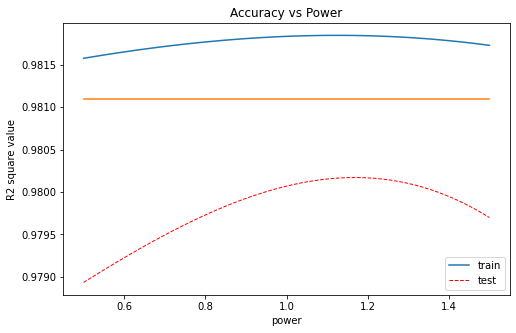

In [29]:
import math
accuracy_train = []
accuracy_test = []
x = np.linspace(0.5, 1.5, 50)

for p in x:   

    p1 = p
    p2 = -0.8
    p3 = 1
    df_str = df_stress.copy()
    df_str_test = df_stress_test.copy()
    df_str['tm'] = df_str['tm'].apply(lambda x: math.pow(x,p1))
    df_str_test['tm'] = df_str_test['tm'].apply(lambda x: math.pow(x,p1))
    df_str['ts'] = df_str['ts'].apply(lambda x: math.pow(x,p2))
    df_str_test['ts'] = df_str_test['ts'].apply(lambda x: math.pow(x,p2))
    df_str['tv'] = df_str['tv'].apply(lambda x: math.pow(x,p1))
    df_str_test['tv'] = df_str_test['tv'].apply(lambda x: math.pow(x,p1))
    df_str['Rib'] = df_str['Rib'].apply(lambda x: math.pow(x,p1))
    df_str_test['Rib'] = df_str_test['Rib'].apply(lambda x: math.pow(x,p1))
    df_str['D2'] = df_str['D2'].apply(lambda x: math.pow(x,p3))
    df_str_test['D2'] = df_str_test['D2'].apply(lambda x: math.pow(x,p3))    

    # Input parameters
    x_train_str = df_str[['D2','Rib','tm','ts','tv']]
    x_test_str = df_str_test[['D2','Rib','tm','ts','tv']]

    accuracy_train1, accuracy_test1 = polyEstimate(x_train_str, ym_train_stress.Ss, x_test_str, ym_test_stress.Ss,order=2,output=0)
    accuracy_train.append(accuracy_train1)
    accuracy_test.append(accuracy_test1)
    
import matplotlib.pyplot as plt
import numpy as np

plt.figure(num = 3, figsize=(8, 5))
plt.plot(x, accuracy_train, label='train')
plt.plot(x, 0.9811*np.ones(50))
plt.plot(x, accuracy_test, 
         color='red',   
         linewidth=1.0,  
         linestyle='--', 
         label='test'
        )

plt.legend()
plt.xlabel("power")
plt.ylabel("R2 square value")
plt.title("Accuracy vs Power")

plt.show()

<h2 style="color:cyan">Best model for side stress</h2>

In [30]:
p1 = 1.1
p2 = -0.8
p3 = 1
df_str = df_stress.copy()
df_str_test = df_stress_test.copy()
df_str['tm'] = df_str['tm'].apply(lambda x: math.pow(x,p1))
df_str_test['tm'] = df_str_test['tm'].apply(lambda x: math.pow(x,p1))
df_str['ts'] = df_str['ts'].apply(lambda x: math.pow(x,p2))
df_str_test['ts'] = df_str_test['ts'].apply(lambda x: math.pow(x,p2))
df_str['tv'] = df_str['tv'].apply(lambda x: math.pow(x,p1))
df_str_test['tv'] = df_str_test['tv'].apply(lambda x: math.pow(x,p1))
df_str['Rib'] = df_str['Rib'].apply(lambda x: math.pow(x,p1))
df_str_test['Rib'] = df_str_test['Rib'].apply(lambda x: math.pow(x,p1))
df_str['D2'] = df_str['D2'].apply(lambda x: math.pow(x,p3))
df_str_test['D2'] = df_str_test['D2'].apply(lambda x: math.pow(x,p3))

# Input parameters
x_train_str = df_str[['D2','Rib','tm','ts','tv']]
x_test_str = df_str_test[['D2','Rib','tm','ts','tv']]

accuracy_train1, accuracy_test1 = polyEstimate(x_train_str, ym_train_stress.Ss, x_test_str, ym_test_stress.Ss,order=2,output=1)

Residual sum of squares for train (MSE): 447.02
R2-score for train: 0.98
Residual sum of squares for test (MSE): 294.34
R2-score for test: 0.98
Coefficent shape: (1, 21)


In [31]:
# Evaluation
p1 = 1.1
p2 = -0.8
p3 = 1
df_str = df_stress.copy()
df_str_eva = df_stress_eva.copy()
df_str['tm'] = df_str['tm'].apply(lambda x: math.pow(x,p1))
df_str_eva['tm'] = df_str_eva['tm'].apply(lambda x: math.pow(x,p1))
df_str['ts'] = df_str['ts'].apply(lambda x: math.pow(x,p2))
df_str_eva['ts'] = df_str_eva['ts'].apply(lambda x: math.pow(x,p2))
df_str['tv'] = df_str['tv'].apply(lambda x: math.pow(x,p1))
df_str_eva['tv'] = df_str_eva['tv'].apply(lambda x: math.pow(x,p1))
df_str['Rib'] = df_str['Rib'].apply(lambda x: math.pow(x,p1))
df_str_eva['Rib'] = df_str_eva['Rib'].apply(lambda x: math.pow(x,p1))
df_str['D2'] = df_str['D2'].apply(lambda x: math.pow(x,p3))
df_str_eva['D2'] = df_str_eva['D2'].apply(lambda x: math.pow(x,p3))

# Input parameters
x_train_str = df_str[['D2','Rib','tm','ts','tv']]
x_eva_str = df_str_eva[['D2','Rib','tm','ts','tv']]

accuracy_train1, accuracy_eva1 = polyEstimate(x_train_str, ym_train_stress.Ss, x_eva_str, ym_eva_stress.Ss,order=2,output=1)

Residual sum of squares for train (MSE): 447.02
R2-score for train: 0.98
Residual sum of squares for test (MSE): 1685.94
R2-score for test: 0.97
Coefficent shape: (1, 21)


In [47]:
# Evaluation original
polyEstimate(x_train_stress, ym_train_stress.Ss, x_eva_stress, ym_eva_stress.Ss, print_test=1, output=1)

    True_Value  Predict_Value
0       561.40     541.041370
1       510.20     458.932874
2      1200.00    1117.984615
3       350.80     338.349291
4       355.30     329.153524
5       697.70     711.738613
6       260.50     278.694234
7       181.46     212.161449
8       141.80     141.230856
9       507.00     457.610070
10      362.50     381.404550
11      436.20     492.104073
12      521.10     475.858404
13      443.50     471.746195
14      439.30     461.981384
15      387.50     353.636074
16      248.30     274.615386
17      339.10     358.286842
18      282.00     308.250825
19      224.80     243.248282
20      243.60     268.429049
Residual sum of squares for train (MSE): 843.46
R2-score for train: 0.97
Residual sum of squares for test (MSE): 1200.64
R2-score for test: 0.98
Coefficent shape: (1, 21)


(array([ 57.72350487,  57.57457139,  58.87217143,  61.616305  ,
         56.74645576,  58.52222469,  57.78043999, 102.78007444,
         33.58144152,  74.80323463,  71.67064898,  88.97182444,
        468.08750671, 477.97794771, 472.30946044, 465.31208649,
        445.07252877, 489.56198011, 509.49594899, 584.8152673 ,
        361.24791526, 237.07465217, 387.14849098, 562.68699558,
        755.76984898, 158.066528  , 163.87887992, 160.2494372 ,
        157.33015233, 153.41351525, 166.21717513, 169.71480949,
        225.24658493, 108.39736386,  98.56495536, 179.73788684,
        216.89251841, 470.8571833 , 474.94120695, 472.17592836,
        470.98497176, 465.41394745, 474.75991462, 477.12214142,
        676.60010845, 384.45548454, 417.39501219, 411.13687508,
        540.97354812, 685.09015343, 346.02472148, 346.84442224,
        345.7113051 , 347.78467139, 344.57513677, 345.93380167,
        344.30237733, 518.98899555, 292.40167381, 358.11985254,
        306.23044192, 393.14951477, 491.

<h2 style="color:cyan">Polynomial Regression Model - All inputs - Vane stress</h2>

In [32]:
# All parameters
polyEstimate(x_train_stress, ym_train_stress.Sv, x_test_stress, ym_test_stress.Sv, print_test=1)

    True_Value  Predict_Value
0       329.40     352.847347
1       288.30     305.600570
2       243.70     289.671056
3       139.70     150.853019
4       115.60     117.211527
5       560.60     546.662578
6       423.77     467.604617
7       621.60     610.146098
8       803.20     731.935151
9       230.80     261.243513
10      211.10     226.418859
11      183.20     203.959596
12      370.10     388.395748
13      376.60     407.613968
14      377.20     380.186978
15      404.10     411.116981
16      294.20     291.663691
17      109.50     118.298973
18      468.40     469.269421
19      388.50     422.023388
20      474.50     480.909818
21      605.70     648.858820
22      259.70     263.546657
23      167.50     202.815834
24      181.30     231.174294
25      316.90     335.406885
26      376.50     371.689943
27      391.56     375.478238
Residual sum of squares for train (MSE): 1048.56
R2-score for train: 0.97
Residual sum of squares for test (MSE): 744.58
R2-score 

(array([ 62.15330744,  46.82966848,  55.50768411,  88.1873543 ,
         56.20437282,  69.77145526,  71.68330788,  78.60213493,
         54.23918287,  73.97794297,  45.99928541,  63.21745923,
        401.34543707, 376.46241021, 376.90309635, 449.78943237,
        378.15258009, 418.83199886, 430.61226544, 445.72368011,
        361.20506379, 316.49132648, 432.43826365, 401.32652872,
        516.54473702, 132.86465493, 148.28346075, 128.57323055,
        161.15773389, 122.84928513, 148.61567313, 154.35132153,
        162.29179755, 109.97555138,  99.7643535 , 125.83753136,
        144.86059874, 694.78594003, 550.17773639, 610.48101092,
        803.09252371, 693.45597914, 690.40960571, 680.32697619,
        746.17408322, 690.82047583, 734.27769062, 802.67610162,
        606.15472203, 544.14831106, 492.94964352, 386.77125066,
        427.85961981, 582.04132182, 488.70147002, 491.49152183,
        484.32710494, 544.44064233, 488.88132371, 532.2356829 ,
        582.99842495, 424.90463342, 404.

<h2 style="color:cyan">Vane stress - Remodeling</h2>

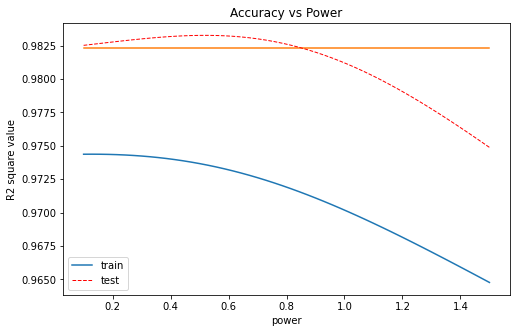

In [33]:
import math
accuracy_train = []
accuracy_test = []
x = np.linspace(0.1, 1.5, 50)

for p in x:   

    p1 = p
    p2 = 0.1
    p3 = 3
    p4 = 1

    df_str = df_stress.copy()
    df_str_test = df_stress_test.copy()
    df_str['tm'] = df_str['tm'].apply(lambda x: math.pow(x,p1))
    df_str_test['tm'] = df_str_test['tm'].apply(lambda x: math.pow(x,p1))
    df_str['ts'] = df_str['ts'].apply(lambda x: math.pow(x,p1))
    df_str_test['ts'] = df_str_test['ts'].apply(lambda x: math.pow(x,p1))
    df_str['tv'] = df_str['tv'].apply(lambda x: math.pow(x,p2))
    df_str_test['tv'] = df_str_test['tv'].apply(lambda x: math.pow(x,p2))
    df_str['Rib'] = df_str['Rib'].apply(lambda x: math.pow(x,p4))
    df_str_test['Rib'] = df_str_test['Rib'].apply(lambda x: math.pow(x,p4))
    df_str['D2'] = df_str['D2'].apply(lambda x: math.pow(x,p3))
    df_str_test['D2'] = df_str_test['D2'].apply(lambda x: math.pow(x,p3))    

    # Input parameters
    x_train_str = df_str[['D2','Rib','tm','ts','tv']]
    x_test_str = df_str_test[['D2','Rib','tm','ts','tv']]

    accuracy_train1, accuracy_test1 = polyEstimate(x_train_str, ym_train_stress.Sv, x_test_str, ym_test_stress.Sv,order=2,output=0)
    accuracy_train.append(accuracy_train1)
    accuracy_test.append(accuracy_test1)
    
import matplotlib.pyplot as plt
import numpy as np

plt.figure(num = 3, figsize=(8, 5))
plt.plot(x, accuracy_train, label='train')
plt.plot(x, 0.9823*np.ones(50))
plt.plot(x, accuracy_test, 
         color='red',   
         linewidth=1.0,  
         linestyle='--', 
         label='test'
        )

plt.legend()
plt.xlabel("power")
plt.ylabel("R2 square value")
plt.title("Accuracy vs Power")

plt.show()

<h2 style="color:cyan">Best model for vane stress</h2>

In [42]:
p1 = 0.1
p2 = 0.1
p3 = 3
p4 = 1
df_str = df_stress.copy()
df_str_test = df_stress_test.copy()
df_str['tm'] = df_str['tm'].apply(lambda x: math.pow(x,p1))
df_str_test['tm'] = df_str_test['tm'].apply(lambda x: math.pow(x,p1))
df_str['ts'] = df_str['ts'].apply(lambda x: math.pow(x,p1))
df_str_test['ts'] = df_str_test['ts'].apply(lambda x: math.pow(x,p1))
df_str['tv'] = df_str['tv'].apply(lambda x: math.pow(x,p2))
df_str_test['tv'] = df_str_test['tv'].apply(lambda x: math.pow(x,p2))
df_str['Rib'] = df_str['Rib'].apply(lambda x: math.pow(x,p4))
df_str_test['Rib'] = df_str_test['Rib'].apply(lambda x: math.pow(x,p4))
df_str['D2'] = df_str['D2'].apply(lambda x: math.pow(x,p3))
df_str_test['D2'] = df_str_test['D2'].apply(lambda x: math.pow(x,p3))

# Input parameters
x_train_str = df_str[['D2','Rib','tm','ts','tv']]
x_test_str = df_str_test[['D2','Rib','tm','ts','tv']]

accuracy_train1, accuracy_test1 = polyEstimate(x_train_str, ym_train_stress.Sv, x_test_str, ym_test_stress.Sv,order=2,output=1)

Residual sum of squares for train (MSE): 777.13
R2-score for train: 0.97
Residual sum of squares for test (MSE): 462.04
R2-score for test: 0.98
Coefficent shape: (1, 21)


In [44]:
# Evaluation data

p1 = 0.1
p2 = 0.1
p3 = 3
p4 = 1
df_str = df_stress.copy()
df_str_eva = df_stress_eva.copy()
df_str['tm'] = df_str['tm'].apply(lambda x: math.pow(x,p1))
df_str_eva['tm'] = df_str_eva['tm'].apply(lambda x: math.pow(x,p1))
df_str['ts'] = df_str['ts'].apply(lambda x: math.pow(x,p1))
df_str_eva['ts'] = df_str_eva['ts'].apply(lambda x: math.pow(x,p1))
df_str['tv'] = df_str['tv'].apply(lambda x: math.pow(x,p2))
df_str_eva['tv'] = df_str_eva['tv'].apply(lambda x: math.pow(x,p2))
df_str['Rib'] = df_str['Rib'].apply(lambda x: math.pow(x,p4))
df_str_eva['Rib'] = df_str_eva['Rib'].apply(lambda x: math.pow(x,p4))
df_str['D2'] = df_str['D2'].apply(lambda x: math.pow(x,p3))
df_str_eva['D2'] = df_str_eva['D2'].apply(lambda x: math.pow(x,p3))

# Input parameters
x_train_str = df_str[['D2','Rib','tm','ts','tv']]
x_eva_str = df_str_eva[['D2','Rib','tm','ts','tv']]

accuracy_train1, accuracy_eva1 = polyEstimate(x_train_str, ym_train_stress.Sv, x_eva_str, ym_eva_stress.Sv,order=2,output=1)

Residual sum of squares for train (MSE): 777.13
R2-score for train: 0.97
Residual sum of squares for test (MSE): 4215.96
R2-score for test: 0.91
Coefficent shape: (1, 21)


In [48]:
# Original model evaluation
polyEstimate(x_train_stress, ym_train_stress.Sv, x_eva_stress, ym_eva_stress.Sv, print_test=1, output=1)

    True_Value  Predict_Value
0        849.2     812.602347
1        522.3     526.514809
2        914.2     731.474514
3        720.8     649.754455
4        433.1     459.514038
5        647.6     574.851502
6        197.8     190.875106
7        169.8     167.883041
8        140.2     154.668693
9        409.8     428.680888
10       341.5     365.603914
11       419.4     406.548390
12       543.1     531.443900
13       419.9     438.832492
14       412.9     412.084101
15       301.3     310.610600
16       333.8     328.998287
17       289.8     310.940094
18       226.2     246.943609
19       204.0     207.112218
20       220.1     239.811550
Residual sum of squares for train (MSE): 1048.56
R2-score for train: 0.97
Residual sum of squares for test (MSE): 2334.62
R2-score for test: 0.95
Coefficent shape: (1, 21)


(array([ 62.15330744,  46.82966848,  55.50768411,  88.1873543 ,
         56.20437282,  69.77145526,  71.68330788,  78.60213493,
         54.23918287,  73.97794297,  45.99928541,  63.21745923,
        401.34543707, 376.46241021, 376.90309635, 449.78943237,
        378.15258009, 418.83199886, 430.61226544, 445.72368011,
        361.20506379, 316.49132648, 432.43826365, 401.32652872,
        516.54473702, 132.86465493, 148.28346075, 128.57323055,
        161.15773389, 122.84928513, 148.61567313, 154.35132153,
        162.29179755, 109.97555138,  99.7643535 , 125.83753136,
        144.86059874, 694.78594003, 550.17773639, 610.48101092,
        803.09252371, 693.45597914, 690.40960571, 680.32697619,
        746.17408322, 690.82047583, 734.27769062, 802.67610162,
        606.15472203, 544.14831106, 492.94964352, 386.77125066,
        427.85961981, 582.04132182, 488.70147002, 491.49152183,
        484.32710494, 544.44064233, 488.88132371, 532.2356829 ,
        582.99842495, 424.90463342, 404.

<h2 style="color:cyan">Polynomial Regression Model - All inputs - Frequency</h2>

In [37]:
# All parameters
polyEstimate(x_train_frequency, ym_train_frequency.Frequency0, x_test_frequency, ym_test_frequency.Frequency0, order=2)

Residual sum of squares for train (MSE): 7.00
R2-score for train: 0.90
Residual sum of squares for test (MSE): 14.47
R2-score for test: 0.83
Coefficent shape: (1, 21)


(array([31.44851926, 20.25970257, 39.83705502, 45.42530984, 32.30000286,
        30.50872   , 28.76631297, 33.14638113, 29.72457205, 27.03243389,
        33.58752828, 26.94783897, 44.76669619, 49.30617479, 34.62065976,
        32.43813529, 30.27654082, 33.41207813, 33.32119622, 28.54890428,
        20.80944536, 33.48808227, 35.62697931, 30.45415228, 26.82657829,
        25.2871743 , 30.00068746, 27.10889401, 24.98462973, 41.60351636,
        33.64830201, 46.75844977, 49.11310225, 43.48193785, 39.90801688,
        38.3954394 , 42.3438928 , 40.98436002, 40.50180359, 35.78987946,
        43.2448539 , 47.89954741, 25.53462407, 34.63303947, 33.34090591,
        30.89383029, 35.27643429, 34.91912173, 17.0462557 , 17.82021491,
        11.65831752, 15.46745233, 14.07157097, 18.80798107, 16.1510571 ,
        15.11641616, 34.31765682, 44.61210048, 52.61225655, 27.36133962,
        32.72029753, 31.50371092, 29.20772922, 32.73867733, 31.15190209,
        37.54827892, 44.66275817, 48.97695648, 27.6

<h2 style="color:cyan">Weight estimation</h2>

In [31]:
# All parameters
polyEstimate(x_train_weight, ym_train_weight.Weight, x_test_weight, ym_test_weight.Weight, print_test=1)

    True_Value  Predict_Value
0      184.520     176.479951
1      248.860     236.084607
2       84.123      90.306361
3      313.310     312.549396
4      309.700     304.048681
5      512.980     518.430615
6      369.600     368.439661
7      127.400     126.502633
8      110.600     105.840883
9      182.700     162.259427
10     201.300     190.693377
11     152.800     136.521472
12     257.100     249.386174
13     954.690     947.039191
Residual sum of squares for train (MSE): 60.18
R2-score for train: 1.00
Residual sum of squares for test (MSE): 90.46
R2-score for test: 1.00
Coefficent shape: (1, 15)


(array([ 232.37609684,  187.03379491,  274.55413118,  313.56789793,
         222.9657024 ,  244.00531474,  269.74219135,  208.56779594,
         260.48895062,  318.77738539,   89.15097587,   81.72861934,
         101.62248823,  106.67164407,   87.98716222,   91.26490825,
          97.9712138 ,   91.82610719,   96.83471998,  578.08560236,
         506.22473013,  646.782207  ,  712.31454406,  529.9696476 ,
         629.50614485,  684.23127507,  541.50872467,  620.93142937,
         708.68581059,  434.1247393 ,  379.35578648,  485.72942454,
         534.16984218,  398.69865726,  472.85540907,  514.89066657,
         408.50801272,  464.3242381 ,  526.78596292,  140.19714251,
         168.4801733 ,  193.5989365 ,  108.74984414,  146.20450952,
         153.90715731,  171.79089367,  155.14120972,  173.02610153,
        1054.24412808, 1152.90554808,  917.77337404, 1127.0435263 ,
        1203.14751225,  984.74931758, 1119.46472426, 1251.96864385,
          82.05743862,   89.57604983,   77.11153

<h2 style="color:cyan">GD2 estimation</h2>

In [32]:
# All parameters
polyEstimate(x_train_weight, ym_train_weight.GD2, x_test_weight, ym_test_weight.GD2, print_test=1)

    True_Value  Predict_Value
0       52.388      28.959728
1       70.660      33.842465
2       10.603      34.781193
3      127.700     130.880750
4      129.098     118.022688
5      281.077     301.616569
6      201.710     207.294452
7       25.870      22.213987
8       23.110       8.294989
9       37.470     -16.055300
10      61.660      37.769174
11      47.160      10.770295
12      78.140      62.278594
13     714.040     715.035124
Residual sum of squares for train (MSE): 525.57
R2-score for train: 0.99
Residual sum of squares for test (MSE): 594.30
R2-score for test: 0.98
Coefficent shape: (1, 15)


(array([ 6.40758336e+01,  3.61943275e+01,  8.45361300e+01,  9.75752166e+01,
         7.08073139e+01,  5.90092658e+01,  5.75563882e+01,  5.07979148e+01,
         8.15665834e+01,  1.23523321e+02,  2.63651318e+01,  2.79839652e+01,
         1.75615578e+01,  1.03768171e+01,  3.80217025e+01,  1.56157673e+01,
         2.79729634e+00,  1.55723652e+01, -5.55515628e-01,  3.76793949e+02,
         3.27526082e+02,  4.18640607e+02,  4.53066055e+02,  3.56405348e+02,
         4.08756228e+02,  4.52292185e+02,  3.57077637e+02,  4.01713615e+02,
         4.58528185e+02,  2.01434997e+02,  1.71567070e+02,  2.23881714e+02,
         2.38907221e+02,  1.95297905e+02,  2.19145766e+02,  2.48430213e+02,
         1.97814113e+02,  2.07783013e+02,  2.27454285e+02,  2.25582631e+01,
         2.95599983e+01,  2.91405237e+01,  8.13531809e+00,  1.62082572e+01,
         1.15818521e+01,  1.10093001e+01,  2.62978812e+01,  3.27828994e+01,
         9.59236406e+02,  1.02998800e+03,  8.53356846e+02,  1.01081965e+03,
         1.0

<h2 style="color:cyan">Frequency re-modeling</h2>

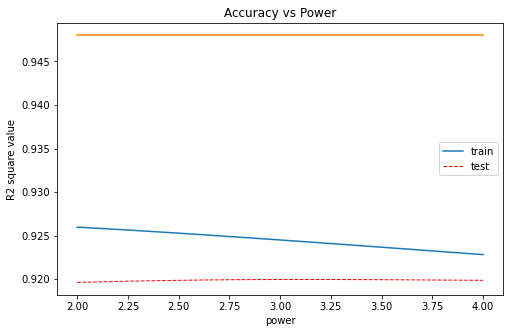

In [38]:
import math
accuracy_train = []
accuracy_test = []
x = np.linspace(2, 4, 50)

for p in x:   

    p1 = p
    p2 = -1.5
    p3 = -0.5
    p4 = 3.2
    df_freq = df_frequency.copy()
    df_freq_test = df_frequency_test.copy()
    df_freq['tm'] = df_freq['tm'].apply(lambda x: math.pow(x,p2))
    df_freq_test['tm'] = df_freq_test['tm'].apply(lambda x: math.pow(x,p2))
    df_freq['ts'] = df_freq['ts'].apply(lambda x: math.pow(x,p1))
    df_freq_test['ts'] = df_freq_test['ts'].apply(lambda x: math.pow(x,p1))
    df_freq['tv'] = df_freq['tv'].apply(lambda x: math.pow(x,p1))
    df_freq_test['tv'] = df_freq_test['tv'].apply(lambda x: math.pow(x,p1))
    df_freq['D2'] = df_freq['D2'].apply(lambda x: math.pow(x,p3))
    df_freq_test['D2'] = df_freq_test['D2'].apply(lambda x: math.pow(x,p3))
    df_freq['DB'] = df_freq['DB'].apply(lambda x: math.pow(x,p4))
    df_freq_test['DB'] = df_freq_test['DB'].apply(lambda x: math.pow(x,p4))

    # Input parameters
    x_train_freq = df_freq[['D2','DB','tm','ts','tv']]
    x_test_freq = df_freq_test[['D2','DB','tm','ts','tv']]

    accuracy_train1, accuracy_test1 = polyEstimate(x_train_freq, ym_train_frequency.Frequency0, x_test_freq, ym_test_frequency.Frequency0,order=2,output=0)
    accuracy_train.append(accuracy_train1)
    accuracy_test.append(accuracy_test1)
    
import matplotlib.pyplot as plt
import numpy as np

plt.figure(num = 3, figsize=(8, 5))
plt.plot(x, accuracy_train, label='train')
plt.plot(x, 0.948*np.ones(50))
plt.plot(x, accuracy_test, 
         color='red',   
         linewidth=1.0,  
         linestyle='--', 
         label='test'
        )

plt.legend()
plt.xlabel("power")
plt.ylabel("R2 square value")
plt.title("Accuracy vs Power")

plt.show()

<h2 style="color:cyan">Frequency best fit model</h2>

In [39]:
p1 = 2.3
p2 = -1.5
p3 = -0.5
p4 = 3.2
df_freq = df_frequency.copy()
df_freq_test = df_frequency_test.copy()
df_freq['tm'] = df_freq['tm'].apply(lambda x: math.pow(x,p2))
df_freq_test['tm'] = df_freq_test['tm'].apply(lambda x: math.pow(x,p2))
df_freq['ts'] = df_freq['ts'].apply(lambda x: math.pow(x,p1))
df_freq_test['ts'] = df_freq_test['ts'].apply(lambda x: math.pow(x,p1))
df_freq['tv'] = df_freq['tv'].apply(lambda x: math.pow(x,p1))
df_freq_test['tv'] = df_freq_test['tv'].apply(lambda x: math.pow(x,p1))
df_freq['D2'] = df_freq['D2'].apply(lambda x: math.pow(x,p3))
df_freq_test['D2'] = df_freq_test['D2'].apply(lambda x: math.pow(x,p3))
df_freq['DB'] = df_freq['DB'].apply(lambda x: math.pow(x,p4))
df_freq_test['DB'] = df_freq_test['DB'].apply(lambda x: math.pow(x,p4))

# Input parameters
x_train_freq = df_freq[['D2','DB','tm','ts','tv']]
x_test_freq = df_freq_test[['D2','DB','tm','ts','tv']]

accuracy_train1, accuracy_test1 = polyEstimate(x_train_freq, ym_train_frequency.Frequency0, x_test_freq, ym_test_frequency.Frequency0,order=2,output=1)

Residual sum of squares for train (MSE): 5.41
R2-score for train: 0.93
Residual sum of squares for test (MSE): 6.77
R2-score for test: 0.92
Coefficent shape: (1, 21)


In [40]:
# Evaluation data

p1 = 2.3
p2 = -1.5
p3 = -0.5
p4 = 3.2
df_freq = df_frequency.copy()
df_freq_eva = df_frequency_eva.copy()
df_freq['tm'] = df_freq['tm'].apply(lambda x: math.pow(x,p2))
df_freq_eva['tm'] = df_freq_eva['tm'].apply(lambda x: math.pow(x,p2))
df_freq['ts'] = df_freq['ts'].apply(lambda x: math.pow(x,p1))
df_freq_eva['ts'] = df_freq_eva['ts'].apply(lambda x: math.pow(x,p1))
df_freq['tv'] = df_freq['tv'].apply(lambda x: math.pow(x,p1))
df_freq_eva['tv'] = df_freq_eva['tv'].apply(lambda x: math.pow(x,p1))
df_freq['D2'] = df_freq['D2'].apply(lambda x: math.pow(x,p3))
df_freq_eva['D2'] = df_freq_eva['D2'].apply(lambda x: math.pow(x,p3))
df_freq['DB'] = df_freq['DB'].apply(lambda x: math.pow(x,p4))
df_freq_eva['DB'] = df_freq_eva['DB'].apply(lambda x: math.pow(x,p4))

# Input parameters
x_train_freq = df_freq[['D2','DB','tm','ts','tv']]
x_eva_freq = df_freq_eva[['D2','DB','tm','ts','tv']]

accuracy_train1, accuracy_eva1 = polyEstimate(x_train_freq, ym_train_frequency.Frequency0, x_eva_freq, ym_eva_frequency.Frequency0,order=2,output=1)

Residual sum of squares for train (MSE): 5.41
R2-score for train: 0.93
Residual sum of squares for test (MSE): 4.33
R2-score for test: 0.92
Coefficent shape: (1, 21)


In [41]:
# Original model evaluation
polyEstimate(x_train_frequency, ym_train_frequency.Frequency0, x_eva_frequency, ym_eva_frequency.Frequency0, order=2)

Residual sum of squares for train (MSE): 7.00
R2-score for train: 0.90
Residual sum of squares for test (MSE): 4.46
R2-score for test: 0.92
Coefficent shape: (1, 21)


(array([31.44851926, 20.25970257, 39.83705502, 45.42530984, 32.30000286,
        30.50872   , 28.76631297, 33.14638113, 29.72457205, 27.03243389,
        33.58752828, 26.94783897, 44.76669619, 49.30617479, 34.62065976,
        32.43813529, 30.27654082, 33.41207813, 33.32119622, 28.54890428,
        20.80944536, 33.48808227, 35.62697931, 30.45415228, 26.82657829,
        25.2871743 , 30.00068746, 27.10889401, 24.98462973, 41.60351636,
        33.64830201, 46.75844977, 49.11310225, 43.48193785, 39.90801688,
        38.3954394 , 42.3438928 , 40.98436002, 40.50180359, 35.78987946,
        43.2448539 , 47.89954741, 25.53462407, 34.63303947, 33.34090591,
        30.89383029, 35.27643429, 34.91912173, 17.0462557 , 17.82021491,
        11.65831752, 15.46745233, 14.07157097, 18.80798107, 16.1510571 ,
        15.11641616, 34.31765682, 44.61210048, 52.61225655, 27.36133962,
        32.72029753, 31.50371092, 29.20772922, 32.73867733, 31.15190209,
        37.54827892, 44.66275817, 48.97695648, 27.6

<h2 style="color:cyan">Monte Carlo Simulation for stress prediction</h2>

In [59]:
def polyEstimate_single(x_train_sm, y_train_sm, x_test_sm, order=2): 

    # Transform input data into polynominal features
    x_train_sm_transform = PolynomialFeatures(degree=order).fit_transform(x_train_sm)
    x_test_sm_transform = PolynomialFeatures(degree=order).fit_transform(x_test_sm)

    # Create a linear regression model
    poly = LinearRegression()
    poly.fit(x_train_sm_transform, y_train_sm)  # transformed x data can be used as a linear regression model

    # Predict value of test data   
    yhat_test_sm = poly.predict(x_test_sm_transform)
    return yhat_test_sm   

In [69]:
# combine test and train to form a single frame
x_stress_total = pd.concat([x_train_stress, x_test_stress])
y_stress_total = pd.concat([ym_train_stress, ym_test_stress])

print(x_train_stress.shape)
print(x_stress_total.shape)
print(y_stress_total.shape)

(132, 5)
(163, 5)
(163, 4)


In [84]:
# To be continued with test data 
import random

Sv_hat_range = []

for i in range(x_eva_stress.shape[0]):

    Sv_hat = []
    x_test_Sv = x_eva_stress[0:0]  # Extract the 1st value
    x_test_Sv.loc[-1] = x_eva_stress.iloc[i]

    for x in range(x_train_stress.shape[0]):
        droplist = random.sample(range(0, x_stress_total.shape[0]), 30)
        x_stress_random = x_stress_total.drop(x_stress_total.index[droplist])
        y_stress_random = y_stress_total.drop(y_stress_total.index[droplist])
    
        # Estimate value 
        y_hat_Sv = polyEstimate_single(x_stress_random, y_stress_random.Sv,x_test_Sv,2)
        Sv_hat.append(y_hat_Sv)

    Sv_hat_range.append(sum(Sv_hat) / len(Sv_hat))        
Sv_hat_range

C:\Users\hp\anaconda3\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\hp\anaconda3\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\hp\anaconda3\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\hp\anaconda3\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning:



[array([812.44505248]),
 array([543.21015922]),
 array([743.26384917]),
 array([648.09330775]),
 array([453.88661154]),
 array([571.58527572]),
 array([201.88309246]),
 array([155.37571267]),
 array([131.51461238])]